In [1]:
from pathlib import Path
import os
import sys
from transformers import AutoProcessor, AutoModelForCausalLM
import torch
from datasets import load_from_disk
sys.path.append(str(Path.cwd().parent))

/home/nico/Thesis/neural-artwork-caption-generator/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from src.utils.dirutils import get_data_dir, get_models_dir

In [3]:
MODEL_NAME = "microsoft/git-base"
PROCESSOR = AutoProcessor.from_pretrained(MODEL_NAME)
MODEL = AutoModelForCausalLM.from_pretrained(MODEL_NAME)
OUTPUT_DIR = "microsoft_git-base_artgraph"
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
BATCH_SIZE = 1 # choose according to your GPU memory (<= 64) we'll use gradient accumulation

In [4]:
# checkpoint = torch.load(get_models_dir() / "captioning" / "0.pt")
# MODEL.load_state_dict(checkpoint["model_state_dict"])
MODEL.to(DEVICE)

GitForCausalLM(
  (git): GitModel(
    (embeddings): GitEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(1024, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (image_encoder): GitVisionModel(
      (vision_model): GitVisionTransformer(
        (embeddings): GitVisionEmbeddings(
          (patch_embedding): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16), bias=False)
          (position_embedding): Embedding(197, 768)
        )
        (pre_layrnorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (encoder): GitVisionEncoder(
          (layers): ModuleList(
            (0-11): 12 x GitVisionEncoderLayer(
              (self_attn): GitVisionAttention(
                (k_proj): Linear(in_features=768, out_features=768, bias=True)
                (v_proj): Linear(in_features=768, out_features=768, bias=True)
             

In [5]:
dataset = load_from_disk(get_data_dir() / "processed" / "captioning_dataset_augmented_processed")["validation"]

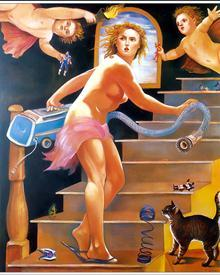

['action figures in a playful and colorful style with abstract shapes and lines', 'action figures in a playful and colorful style with abstract shapes and lines', 'action figures in playful and colorful style with abstract shapes and lines']
a painting of a woman in a pink skirt and a blue wagon.


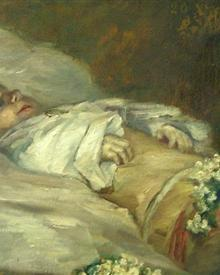

['a close-up of a hand holding a flower', 'a close-up of a hand holding a flower', 'a close-up of a hand holding a flower']
the man in the white shirt


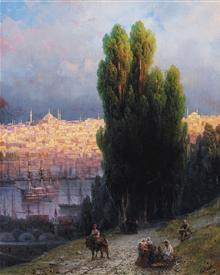

["a view of constantinople with the city's skyline and the sea in the background", 'a view of constantinople with the city horizon and the sea in the background', 'a view of constantinople with the skyline of the city and the sea in the background']
a landscape with a castle in the background


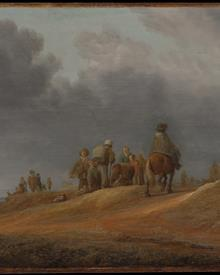

['a market by the seashore', 'a market by the sea', 'a market on the coast']
a group of people on horseback


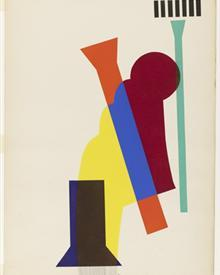

['a concrete mixer with a mysterious figure emerging from within, hinting at hidden depths and unexpected surprises', 'a concrete mixer with a mysterious figure emerging from the inside, evoking hidden depths and unexpected surprises', 'a concrete mixer with a mysterious figure that emerges from the inside and points to hidden depths and unexpected surprises']
a colorful illustration of a man in a blue suit


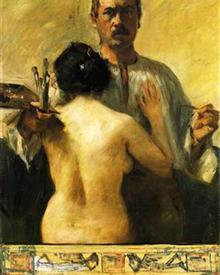

['the artist painting a female model, with both figures wearing traditional clothing, against a blue and green background with ornate details', 'the artist painting a female model, with the two figures wearing traditional clothes, on a blue and green background with adorned details', 'the artist paints a female model, with both figures wearing traditional clothes, in front of a blue and green background with decorated details']
painting artist, painting of a man


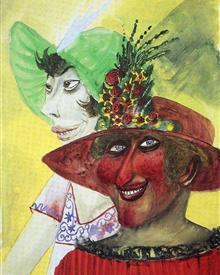

['a group of prostitutes, with a focus on their physical attributes and their role in society, with a range of warm and cool colors', 'a group of prostitutes, with an emphasis on their physical attributes and their role in society, with a range of warm and cool colors', 'a group of prostitutes, with a focus on their physical characteristics and their role in society, with a number of warm and cool colors']
lady in green hat


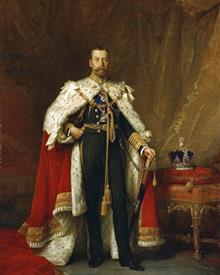

['king George V, wearing a black suit with a white shirt and a red tie, standing in front of a blue curtain', 'king George V, wearing a black suit with a white shirt and a red tie, standing in front of a blue curtain', 'king George V was wearing a black suit with a white shirt and a red tie standing in front of a blue curtain']
portrait of monarch in his portrait


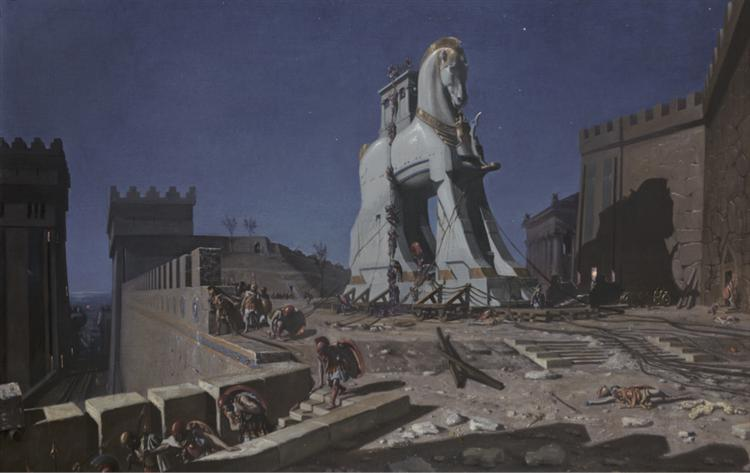

['the Trojan horse, a large wooden horse used by the Greeks to sneak into Troy during the Trojan War', 'the Trojan, a large wooden horse used by the Greeks to sneak into Troy during the Trojan War', 'the Trojan horse, a large wooden horse used by the Greeks to sneak to Troy during the Trojan War']
a large white statue of an elephant


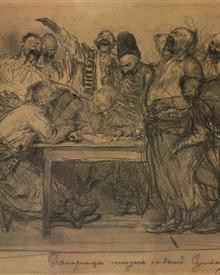

['a group of fierce-looking Cossack warriors gathered around a table, with weapons and armor visible in the background', 'a group of fiercely-looking Cossack warriors gathered around a table, with weapons and armor visible in the background', 'a group of violent-looking Cossack warriors gathered around a table, with weapons and armor visible in the background']
a drawing of a woman in a dress and a chicken


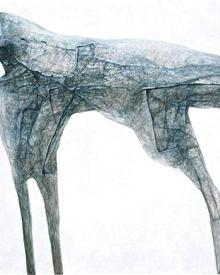

['a bleak, post-apocalyptic landscape with twisted, gnarled structures and ghostly, translucent figures', 'a dark, post-apocalyptic landscape with twisted, embarrassed and ghostly structures, translucent figures', 'a desolate, post-apocalyptic landscape with twisted, gnarled structures and ghostly, translucent figures']
a woman standing in a tree


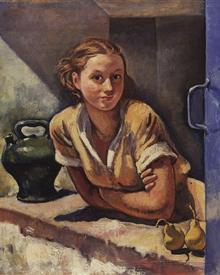

['katia sitting on a terrace in collioure', 'katia sitting on a terrace in collioure', 'katia sits on a terrace in collioure']
girl in kitchen


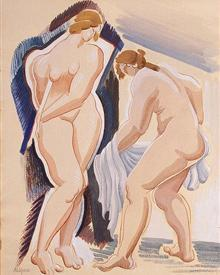

['two nude female figures draped in a cloth, standing and facing each other', 'two naked female figures draped in a cloth, standing and facing each other', 'two naked female figures in a cloth, standing and facing each other']
two women in white dress


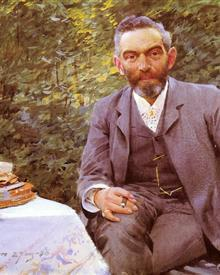

['a group of people having breakfast in a green outdoor setting', 'a group of people taking breakfast in a green outdoor setting', 'a group of people who eat breakfast outdoors in a green environment']
a white tablecloth


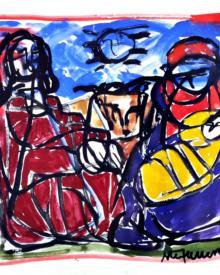

['the Holy Family in a gentle and tender way, with soft colors and warm light, evoking a sense of peace and love', 'The Holy Family in a gentle and tender way, with soft colors and warm light, evoking a feeling of peace and love', 'the Holy Family in a gentle and tender way, with soft colors and warm light, which gives a feeling of peace and love']
girl in red


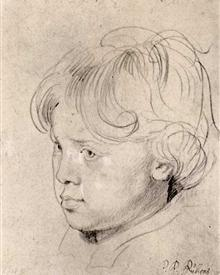

["Nicolas Rubens, the artist's brother, wearing a black hat and holding a book", "Nicolas Rubens, the artist's brother, wearing a black hat and holding a book", "Nicolas Rubens, the artist's brother, wore a black hat and held a book"]
drawing of a boy in his drawings


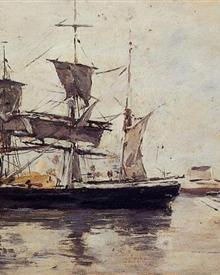

['a large three-masted ship docked in the harbor, with other boats and buildings in the background', 'a large vessel with three masts docked in the port, with other vessels and vessels in the background', 'a large three-masted ship docked in the port, with other boats and buildings in the background']
man in a sailboat


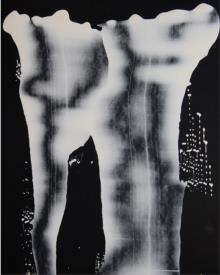

['a chaotic and fragmented composition, with overlapping layers of color and texture creating a sense of depth and complexity', 'chaotic and fragmented composition, with overlapping layers of colour and texture, creating a sense of depth and complexity', 'a chaotic and fragmented composition with overlapping layers of colour and texture that create a feeling of depth and complexity']
black and white photo of a black cat in a tree


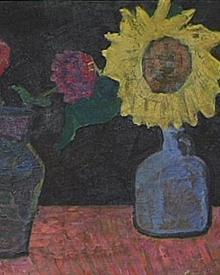

['a bright yellow sunflower on a blue background', 'a bright yellow sunflower on a blue background', 'a bright yellow sunflower on a blue background']
a black painted wall


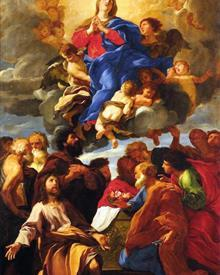

['the ascension of Mary into heaven, surrounded by angels and apostles', 'the ascension of Mary in heaven, surrounded by angels and apostles', 'the ascension of mary to heaven, surrounded by angels and apostles']
the painting was a painter of the past.


In [7]:
for i, example in enumerate(dataset.select((range(720, 740)))):
    display(example["image"])
    pixel_values = PROCESSOR(images=example["image"], return_tensors="pt").pixel_values.to(DEVICE)
    generated_ids = MODEL.generate(pixel_values=pixel_values, max_length=50, num_beams=1, no_repeat_ngram_size=2)
    generated_caption = PROCESSOR.batch_decode(generated_ids, skip_special_tokens=True)[0]
    print(example["captions"])
    print(generated_caption)